<a href="https://colab.research.google.com/github/ppokranguser/Artificial_Intelligence_study/blob/main/240924_logistic_regression_blanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression using PyTorch!

# Import Packages

In [2]:
# import packeges here

#To see the progress
from tqdm.notebook import tqdm
# from tqdm import tqdm # for VSCODE, PYCHARM...OTHER "".py" BASED IDE.

# For visualization
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import train_test_split # for train/test split

# Make the dataset!

In [16]:
# Make the dataset here
# Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print('Number of samples: {}, Number of features: {}'.format(n_samples, n_features))

print(X)
print(y)

Number of samples: 569, Number of features: 30
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1

In [22]:

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert from numpy to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape y tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# Define the model

In [23]:
#Create model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) # (W_1*X_1 + W_2*X_2 + ... W_N*X_N + B)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# Define a loss function and training process

In [24]:
# Loss and optimizer
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 200

# define a list to save the loss
loss_saver = list()

for epoch in tqdm(range(num_epochs)):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    # updates
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    loss_saver.append(loss.detach())
    if (epoch+1) % 10 == 0: # save the trained model at every 10 epochs
        print('Epoch: {}, Loss : {}'.format(epoch+1, loss))
        #torch.save(model.state_dict(), PATH)


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 10, Loss : 0.24612508714199066
Epoch: 20, Loss : 0.1754128634929657
Epoch: 30, Loss : 0.1459541916847229
Epoch: 40, Loss : 0.12887880206108093
Epoch: 50, Loss : 0.11743959039449692
Epoch: 60, Loss : 0.1091022938489914
Epoch: 70, Loss : 0.10267840325832367
Epoch: 80, Loss : 0.09752960503101349
Epoch: 90, Loss : 0.09327956289052963
Epoch: 100, Loss : 0.08969070762395859
Epoch: 110, Loss : 0.08660479635000229
Epoch: 120, Loss : 0.0839119702577591
Epoch: 130, Loss : 0.08153331279754639
Epoch: 140, Loss : 0.07941046357154846
Epoch: 150, Loss : 0.07749921083450317
Epoch: 160, Loss : 0.0757654458284378
Epoch: 170, Loss : 0.07418229430913925
Epoch: 180, Loss : 0.07272827625274658
Epoch: 190, Loss : 0.07138603180646896
Epoch: 200, Loss : 0.07014130055904388


# Plot the result : training loss

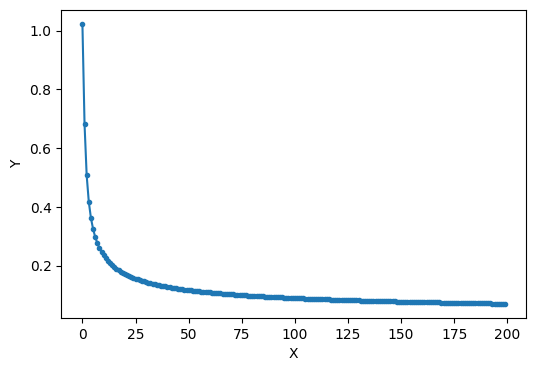

In [25]:
# plot the results
loss_saver = np.array(loss_saver)
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(loss_saver)), loss_saver, '.-')
plt.xlabel('X', fontsize=10)
plt.ylabel('Y', fontsize=10)
plt.show()

# Evaluate the trained model using the testset

In [27]:
# evaluate the trained model
with torch.no_grad():
    y_predicted = model(X_test) # no need to call model.forward()
    y_predicted_cls = y_predicted.round() # round off to nearest class
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) #a accuracy
    print('Accuracy: {}'.format(acc))

Accuracy: 0.9473684430122375
